by : Salwa Dewi Hasanah Caniko

reference : (Chapra 2010) Numerical Methods for Engineers Ed. 6



# **1.1 Aproksimasi dengan Deret Taylor**
Fungsi eksponensial dapat dihitung dengan menggunakan deret sebagai berikut:
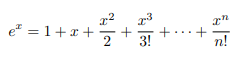

Kita ingin menggunakan Persamaan (1) untuk menghitung estimasi dari 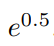
Dengan menggunakan kriteria
dari Scarborough:
image.png
Kita akan menambahkan suku-suku pada Persamaan (1) sampai image.png

Program Python berikut ini dapat digunakan untuk melakukan perhitungan





In [9]:
from math import factorial, exp

def approx_exp(x, N):
  assert(N >= 0)
  if N == 0:
    return 1
  s = 0.0
  for i in range(N+1):
    s = s + x**i/factorial(i)
  return s

x = 0.5
true_val = exp(x) #from math module

n_digit = 3
# Equation 3.7
ε_s_percent = 0.5*10**(2-n_digit)

prev_approx = 0.0
for N in range(50):
    approx_val = approx_exp(x, N)
    ε_t_percent = abs(approx_val - true_val)/true_val * 100
    if N > 0:
        ε_a_percent = abs(approx_val - prev_approx)/approx_val * 100
    else :
        ε_a_percent = float('nan')
    prev_approx = approx_val
    print("%3d %18.10f %10.5f%% %10.5f%%" % (N+1, approx_val, ε_t_percent, ε_a_percent))
    if ε_a_percent < ε_s_percent:
        print("Converged within %d significant digits" % n_digit)
        break


print("true_val is %18.10f" % true_val)
print("approx_val is %18.10f" % approx_val)


  1       1.0000000000   39.34693%        nan%
  2       1.5000000000    9.02040%   33.33333%
  3       1.6250000000    1.43877%    7.69231%
  4       1.6458333333    0.17516%    1.26582%
  5       1.6484375000    0.01721%    0.15798%
  6       1.6486979167    0.00142%    0.01580%
Converged within 3 significant digits
true_val is       1.6487212707
approx_val is       1.6486979167


Catatan: Pada program di atas, for-loop digunakan dengan jumlah iterasi yang relatif besar. Anda dapat
menggunakan while-loop sebagai gantinya

**Soal 1**

Ulangi perhitungan ini untuk jumlah digit signifikan yang berbeda, misalnya 5, 8, dan 10 digit
signifikan. Silakan melakukan modifikasi terhadap program yang diberikan.

In [ ]:
# soal 1

from math import factorial, exp
def approx_exp(x, N):
    assert(N >= 0)
    if N == 0:
        return 1
    s = 0.0
    for i in range(N+1):
        s = s + x**i/factorial(i)
    return s

x = 0.5
true_val = exp(x) # from math module

n_digit = 8
# Equation 3.7
ε_s_percent = 0.5*10**(2-n_digit)

prev_approx = 0.0
for N in range(50):
    approx_val = approx_exp(x, N)
    ε_t_percent = abs(approx_val - true_val)/true_val * 100
    if N > 0:
        ε_a_percent = abs(approx_val - prev_approx)/approx_val * 100
    else:
        ε_a_percent = float('nan')
    prev_approx = approx_val
    print("%3d %18.10f %10.5f%% %10.5f%%" % (N+1, approx_val, ε_t_percent, ε_a_percent))
    if ε_a_percent < ε_s_percent:
        print("Converged within %d significant digits" % n_digit)
        break

print("true_val is %18.10f" % true_val)
print("approx_val is %18.10f" % approx_val)

#Perubahan banyaknya digit berdampak pada hasil aproksimasi dan persen error
#semakin banyak jumlah digit, hasil aproksimasi semakin mendekati nilai sebenarnya
#serta semakin banyak jumlah digit, persen error semakin kecil.

## **1.2 Penggunaan ** *Single Precision * **bold text**

Chapra Contoh 3.2

Secara default, perhitungan dengan floating number pada Python (dan NumPy) dilakukan dengan menggunakan
double precision. Pada bagian ini, kita akan mengulangi Chapra Contoh 3.2 dengan menggunakan single
precision. Pada C dan C++, tipe yang relevan adalah float untuk single precision dan double untuk double
precision. Pada Fortran kita dapat menggunakan REAL(4) untuk single precision dan REAL(8) untuk double
precision.
Karena Python merupakan bahasa pemrograman dinamik yang type-loose kita tidak dapat dengan mudah
memberikan spesifikasi pada variabel yang kita gunakan. Meskipun demikian, kita dapat menggunakan single
precision pada Python melalui np.float32, meskipun program yang dihasilkan kurang elegan. Selain itu, kita juga harus mengecek apakah hasil akhir yang diberikan tetap berupa single precision (tidak terjadi type
promotion ke double precision)

In [4]:
from math import factorial
import numpy as np

def approx_exp(x, N):
    assert(N >= 0)
    if N == 0:
      return 1
    s = np.float32(0.0)
    for i in range(N+1):
        s = s + np.float32(x**i)/np.float32(factorial(i))
    return s

x = np.float32(0.5)
true_val = np.exp(x) # from np module

n_digit = 3
# Equation 3.7
ε_s_percent = np.float32(0.5)*np.float32(10**(2-n_digit))

prev_approx = np.float32(0.0)
for N in range(50):
    approx_val = approx_exp(x, N)
    ε_t_percent = abs(approx_val - true_val)/true_val * 100
    if N > 0:
        ε_a_percent = abs(approx_val - prev_approx)/approx_val * 100
    else:
        ε_a_percent = float('nan')
    prev_approx = approx_val
    print("%3d %18.10f %10.5f%% %10.5f%%" % (N+1, approx_val, ε_t_percent, ε_a_percent))
    if ε_a_percent < ε_s_percent:
      print("Converged within %d significant digits" % n_digit)
      break

print("true_val is %18.10f" % true_val)
print("approx_val is %18.10f" % approx_val)

# Make sure that float32 is used
print()
print("type(true_val) = ", type(true_val))
print("type(approx_val) = ", type(approx_val))

  1       1.0000000000   39.34693%        nan%
  2       1.5000000000    9.02040%   33.33333%
  3       1.6250000000    1.43876%    7.69231%
  4       1.6458333731    0.17516%    1.26583%
  5       1.6484375000    0.01721%    0.15798%
  6       1.6486979723    0.00141%    0.01580%
Converged within 3 significant digits
true_val is       1.6487212181
approx_val is       1.6486979723

type(true_val) =  <class 'numpy.float32'>
type(approx_val) =  <class 'numpy.float32'>


**Soal 2**

Ulangi perhitungan pada Chapra Contoh 3.2 di atas dengan menggunakan single precision dengan jumlah digit
signifikan yang berbeda, misalnya 5, 8, dan 10 digit signifikan (berdasarkan kriteria Scarborough). Bandingkan
hasil yang Anda dapatkan jika double precision. Apa yang dapat Anda simpulkan?

In [10]:
# Soal 2

from math import factorial
import numpy as np

def approx_exp(x, N):
    assert(N >= 0)
    if N == 0:
      return 1
    s = np.float32(0.0)
    for i in range(N+1):
        s = s + np.float32(x**i)/np.float32(factorial(i))
    return s

x = np.float32(0.5)
true_val = np.exp(x) # from np module

n_digit = 8
# Equation 3.7
ε_s_percent = np.float32(0.5)*np.float32(10**(2-n_digit))

prev_approx = np.float32(0.0)
for N in range(50):
    approx_val = approx_exp(x, N)
    ε_t_percent = abs(approx_val - true_val)/true_val * 100
    if N > 0:
        ε_a_percent = abs(approx_val - prev_approx)/approx_val * 100
    else:
        ε_a_percent = float('nan')
    prev_approx = approx_val
    print("%3d %18.10f %10.5f%% %10.5f%%" % (N+1, approx_val, ε_t_percent, ε_a_percent))
    if ε_a_percent < ε_s_percent:
        print("Converged within %d significant digits" % n_digit)
        break

print("true_val is %18.10f" % true_val)
print("approx_val is %18.10f" % approx_val)
# Make sure that float32 is used
print()
print("type(true_val) = ", type(true_val))
print("type(approx_val) = ", type(approx_val))

#Double Pressicion

def approx_exp(x, N):
    assert(N >= 0)
    if N == 0:
      return 1
    s = np.float64(0.0)
    for i in range(N+1):
        s = s + np.float64(x**i)/np.float64(factorial(i))
    return s

x = np.float64(0.5)
true_val = np.exp(x) # from np module

n_digit = 8
# Equation 3.7
ε_s_percent = np.float64(0.5)*np.float64(10**(2-n_digit))

prev_approx = np.float64(0.0)
for N in range(50):
    approx_val = approx_exp(x, N)
    ε_t_percent = abs(approx_val - true_val)/true_val * 100
    if N > 0:
        ε_a_percent = abs(approx_val - prev_approx)/approx_val * 100
    else:
        ε_a_percent = float('nan')
    prev_approx = approx_val
    print("%3d %18.10f %10.5f%% %10.5f%%" % (N+1, approx_val, ε_t_percent, ε_a_percent))
    if ε_a_percent < ε_s_percent:
        print("Converged within %d significant digits" % n_digit)
        break

print("true_val is %18.10f" % true_val)
print("approx_val is %18.10f" % approx_val)
print()
print("type(true_val) = ", type(true_val))
print("type(approx_val) = ", type(approx_val))



#Hasil pendekatan dengan double pressicion lebih mendekati nilai sebenarnya.

  1       1.0000000000   39.34693%        nan%
  2       1.5000000000    9.02040%   33.33333%
  3       1.6250000000    1.43876%    7.69231%
  4       1.6458333731    0.17516%    1.26583%
  5       1.6484375000    0.01721%    0.15798%
  6       1.6486979723    0.00141%    0.01580%
  7       1.6487196684    0.00009%    0.00132%
  8       1.6487212181    0.00000%    0.00009%
  9       1.6487213373    0.00001%    0.00001%
 10       1.6487213373    0.00001%    0.00000%
Converged within 8 significant digits
true_val is       1.6487212181
approx_val is       1.6487213373

type(true_val) =  <class 'numpy.float32'>
type(approx_val) =  <class 'numpy.float32'>
  1       1.0000000000   39.34693%        nan%
  2       1.5000000000    9.02040%   33.33333%
  3       1.6250000000    1.43877%    7.69231%
  4       1.6458333333    0.17516%    1.26582%
  5       1.6484375000    0.01721%    0.15798%
  6       1.6486979167    0.00142%    0.01580%
  7       1.6487196181    0.00010%    0.00132%
  8       1.

# **1.3 Galat Pembulatan (rounding error)**
Chapra Contoh 3.8

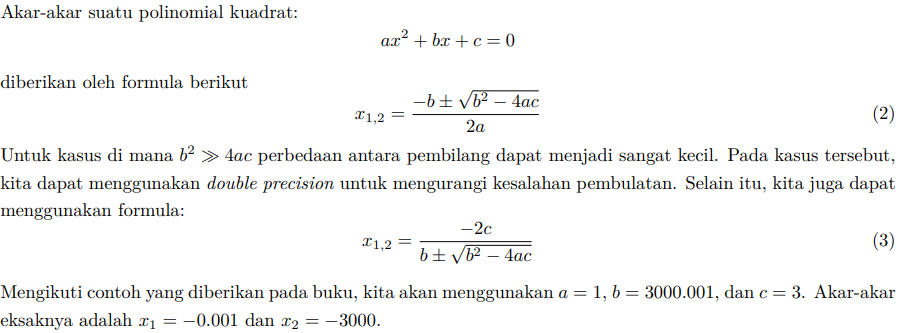



# **Soal 3. **

Buat program Python dengan menggunakan single precision dan double precision untuk melihat
perbedaan hasil yang diberikan dari Persamaan (2) dan Persamaan (3).
Program berikut ini adalah dalam single precision yang dapat Anda lengkapi. Anda juga dapat menggunakan
program yang Anda tulis sendiri dari awal atau modifikasi dari program ini.

Bandingkan akar-akar yang Anda peroleh dengan akar-akar eksak. Untuk masing-masing akar, formula mana
yang memberikan hasil yang paling dekat dengan hasil eksak?

In [ ]:
# Soal 3
import numpy as np

#single precision
def calc_quad_root_v1(a, b, c):
     D = np.float32((b**2)) - np.float32((4)*a*c)
     x1 = (-b + np.sqrt(D))/(np.float32((2)*a))
     x2 = (-b - np.sqrt(D))/(np.float32((2)*a))
     return x1, x2

def calc_quad_root_v2(a, b, c):
     D = np.float32(b**2) - np.float32(4)*a*c
     x1 = (np.float32(-(2*c)))/(b+ np.sqrt(D))
     x2 = (np.float32(-(2*c)))/(b - np.sqrt(D))
     return x1, x2

a = np.float32(1.0)
b = np.float32(6000.001)
c = np.float32(10.0)


x1, x2 = calc_quad_root_v1(a, b, c)
print("Using 1st formula (single precision): approx roots: ", x1, " ", x2)
print(type(x1), type(x2)) # pastikan x1 dan x2 merupakan np.float32

x1, x2 = calc_quad_root_v2(a, b, c)
print(type(x1), type(x2))
print("Using 2nd formula (single precision): approx roots: ", x1, " ", x2)


#double precision
def calc_quad_root_v1(a, b, c):
     D = np.float64((b**2)) - np.float64((4)*a*c)
     x1 = (-b + np.sqrt(D))/(np.float64((2)*a))
     x2 = (-b - np.sqrt(D))/(np.float64((2)*a))
     return x1, x2

def calc_quad_root_v2(a, b, c):
     D = np.float64(b**2) - np.float64(4)*a*c
     x1 = (np.float64(-(2*c)))/(b + np.sqrt(D))
     x2 = (np.float64(-(2*c)))/(b - np.sqrt(D))
     return x1, x2

a = np.float64(1.0)
b = np.float64(6000.001)
c = np.float64(10.0)

x1_true = np.float64(-0.001)
x2_true = np.float64(-3000.0)

x1, x2 = calc_quad_root_v1(a, b, c)
print("Using 1st formula (double precision): approx roots: ", x1, " ", x2)
print(type(x1), type(x2)) # pastikan x1 dan x2 merupakan np.float32

x1, x2 = calc_quad_root_v2(a, b, c)
print(type(x1), type(x2))
print("Using 2nd formula (double precision): approx roots: ", x1, " ", x2)
print("True roots: ", x1_true, " ", x2_true)


#Jika menggunakan single precision, hasil dari formula kedua masih cukup menyimpang dari nilai sesungguhnya
#Dengan me5nggunaakan double precision kedua formula dapat digunakan, karena hasil dari kedua formula memperlihatkan hasil yang mendekati nilai sesungguhnya.

# **Soal 4. **

Program berikut ini, kita akan menggunakan CAS atau computer algebra system untuk memastikan
bahwa formula (2) dan (3) memberikan hasil yang identik. Lengkapi kode berikut ini dan cek apakah hasil yang
diberikan dari kedua formula tersebut adalah sama.

Perhatikan bahwa kode di atas juga mencetak tipe dari variabel x1 dan x2 adalah bilangan integer atau rasional.
Pada SymPy, tipe untuk integer dan rasional adalah:

<class 'sympy.core.numbers.Integer'>

<class 'sympy.core.numbers.Rational'>

Coba turunkan formula (3) dari (2).


In [ ]:
#Soal 4

from sympy import *

def calc_quad_root_v1(a, b, c):
    D = b**2 - 4*a*c
    x1 = (-b + sqrt(D))/(2*a)
    x2 = (-b - sqrt(D))/(2*a)
    return x1, x2

def calc_quad_root_v2(a, b, c):
    D = b**2 - 4*a*c
    x1 = (-2*c)/(b+sqrt(D))
    x2 = (-2*c)/(b-sqrt(D))
    return x1, x2

a = Rational(1)
b = Rational(3000001, 1000)
c = Rational(3)

x1_true = -Rational(1, 1000)
x2_true = -3000

x1, x2 = calc_quad_root_v1(a, b, c)
print("Using 1st formula: appprox roots: ", x1, " ", x2)

x1, x2 = calc_quad_root_v2(a, b, c)
print("Using 2nd formula: appprox roots: ", x1, " ", x2)
print("True roots: ", x1_true, " ", x2_true)

# Hasil yang didapatkan telah sama.


# **1.4 Galat pemotongan (truncation error): deret Taylor**

Chapra Contoh 4.2
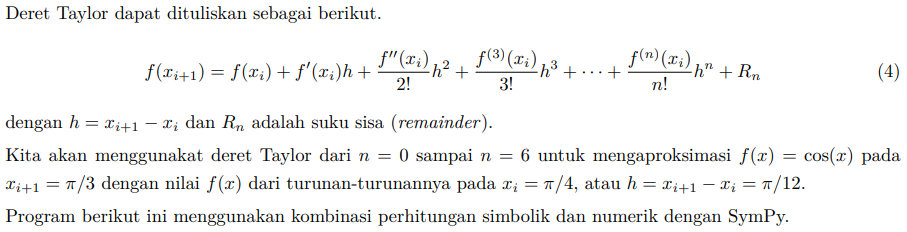

In [11]:
from sympy import * # be very careful when using this!

init_printing(use_unicode=True)
# if you are using Jupyter Lab or Notebook, use the following line instead:
#init_printing(use_latex=True)

x = symbols("x")

f = cos(x)
xi = pi/4
xip1 = pi/3
h = xip1 - xi

# zeroth order
f_approx = diff(f, x, 0).subs({x: xi}) # or simply call cos(xi)

for n in range(1,7): # from 1 to 6
    new_term = diff(f, x, n) * h**n / factorial(n)
    f_approx = f_approx + new_term
    pprint(f_approx)
    print(N(f_approx.subs({x: xi}))) # use N to force numerical expression


f_true = N(f.subs({x: xip1}))
print("f_true = ", f_true)
print(type(f_true))



  π⋅sin(x)   √2
- ──────── + ──
     12      2 
0.521986658763282
              2            
  π⋅sin(x)   π ⋅cos(x)   √2
- ──────── - ───────── + ──
     12         288      2 
0.497754491403425
              3           2            
  π⋅sin(x)   π ⋅sin(x)   π ⋅cos(x)   √2
- ──────── + ───────── - ───────── + ──
     12        10368        288      2 
0.499869146930044
              3           2           4            
  π⋅sin(x)   π ⋅sin(x)   π ⋅cos(x)   π ⋅cos(x)   √2
- ──────── + ───────── - ───────── + ───────── + ──
     12        10368        288        497664    2 
0.500007550810613
              5           3           2           4            
  π⋅sin(x)   π ⋅sin(x)   π ⋅sin(x)   π ⋅cos(x)   π ⋅cos(x)   √2
- ──────── - ───────── + ───────── - ───────── + ───────── + ──
     12       29859840     10368        288        497664    2 
0.500000304000372
              5           3           2           6            4            
  π⋅sin(x)   π ⋅sin(x)   π ⋅sin(x)   π ⋅cos(x)   

# **Soal 5. **

Lakukan modifikasi pada program di atas sehingga dapat menampilkan error atau perbedaan antara
nilai aproksimasi dan nilai benar. Program di atas juga menampilkan deret Taylor yang digunakan secara
simbolik. Anda dapat menonaktifkan baris kode yang sesuai dengan cara menghapusnya atau menjadikannya
komentar.

# **1.5 Galat pemotongan: beda hingga**

Chapra Contoh 4.4

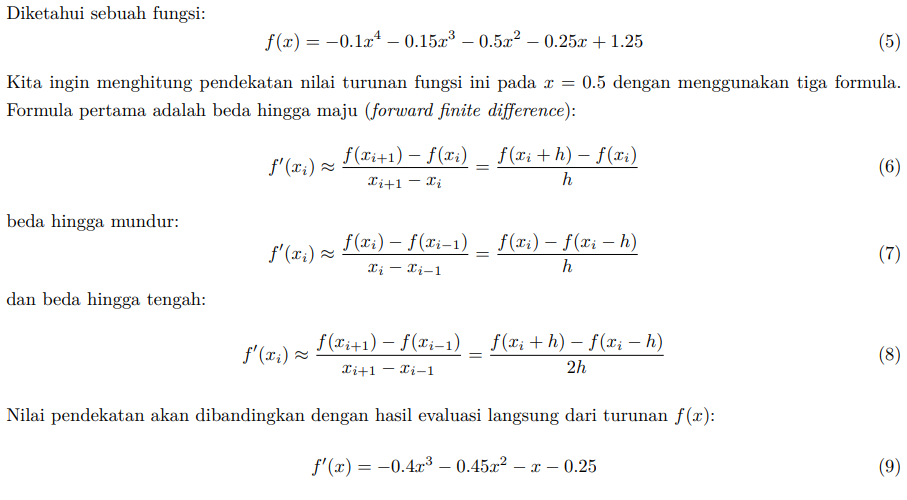

# **Soal 6.**

 Buat program Python untuk menghitung pendekatan nilai f'(x) pada x = 0.5 dengan menggunakan h = 0.5 dan h = 0.25. Bandingkan hasilnya dengan nilai eksak. Formula mana yang memberikan kesalahan paling kecil?

In [ ]:
#Soal 6
from sympy import *

x = symbols("x")

#menyatakan fungsi f(x)
f = -0.1*x**4-0.15*x**3-0.5*x**2-0.25*x+1.25

#mendeklarasikan turunan pertama f(x) terhadap x dengan x=0.5
true_value = diff(f, x, 1).subs({x: 0.5})
print("true value = ", true_value)

# MENGHITUNG DENGAN H=0.25
h_1 = 0.25
print("h = ", h_1)

#menuliskan formula 1-3
formula_1 = (f.subs({x: (0.5+h_1)}) - f.subs({x: 0.5}))/h_1
formula_2 = (f.subs({x: 0.5}) - f.subs({x: 0.5-h_1}))/h_1
formula_3 = (f.subs({x: (0.5+h_1)}) - f.subs({x: (0.5-h_1)}))/(2*h_1)

#menghitung error di tiap formula
error_1 = abs((formula_1 - true_value)/formula_1) * 100
error_2 = abs((formula_2 - true_value)/formula_2) * 100
error_3 = abs((formula_3 - true_value)/formula_3) * 100

print("nilai formula 1 = ", formula_1, ", error 1 = ", error_1)
print("nilai formula 2 = ", formula_2, ", error 2 = ", error_2)
print("nilai formula 3 = ", formula_3, ", error 3 = ", error_3)

# MENGHITUNG DENGAN H=0.5
h_2 = 0.5
print("h = ", h_2)

#menuliskan formula 1-3
formula_1 = (f.subs({x: (0.5+h_2)}) - f.subs({x: 0.5}))/h_2
formula_2 = (f.subs({x: 0.5}) - f.subs({x: 0.5-h}))/h_2
formula_3 = (f.subs({x: (0.5+h_2)}) - f.subs({x: (0.5-h_2)}))/(2*h_2)

#menghitung error di tiap formula
error_1 = abs((formula_1 - true_value)/formula_1) * 100
error_2 = abs((formula_2 - true_value)/formula_2) * 100
error_3 = abs((formula_3 - true_value)/formula_3) * 100

print("nilai formula 1 = ", formula_1, ", error 1 = ", error_1)
print("nilai formula 2 = ", formula_2, ", error 2 = ", error_2)
print("nilai formula 3 = ", formula_3, ", error 3 = ", error_3)


# **1.6 Propagasi galat (error propagation)**

**Chapra Contoh 4.6**

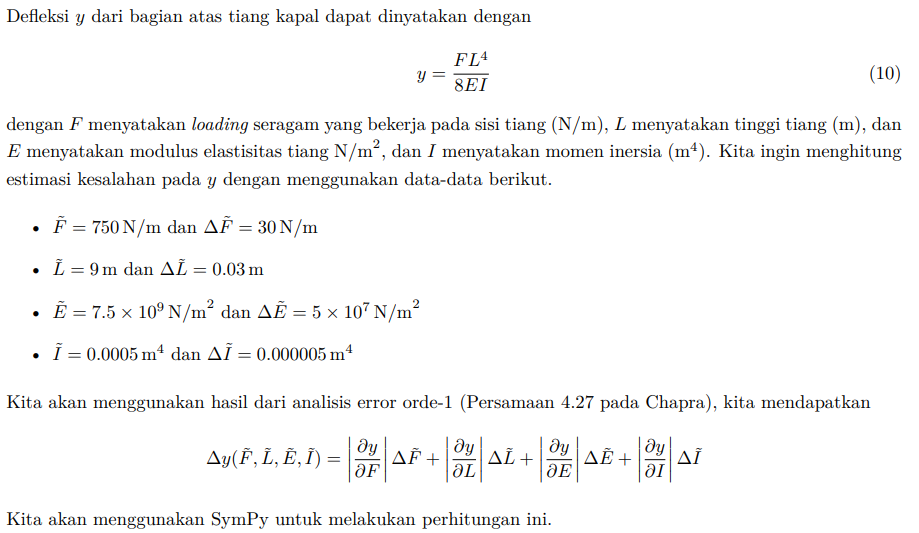

In [12]:
from sympy import *

F, L, E, I = symbols("F L E I")
y = # ... lengkapi, tulis formula untuk menghitung y di sini

F_num = 750; ΔF = 30 # N/m
L_num = 9; ΔL = 0.03 # m
E_num = 7.5e9; ΔE = 5e7 # N/m^2
I_num = 0.0005; ΔI = 0.000005 # m^4

# Hitung nilai y dengan nilai numerik
dict_subs = {F: F_num, L: L_num, E: E_num, I: I_num}
y_num = y.subs(dict_subs)
print("y = ", y_num)

# Hitung nilai Δy dengan Pers. 4.27
Δy = abs(diff(y,F))*ΔF + ... # lengkapi
print(Δy) # bentuk simbolik
print("Δy = ", Δy.subs(dict_subs)) # evaluasi/substitusi nilai numerik

# Hitung nilai ekstrim

dict_subs = {
F: F_num - ΔF, L: L_num - ΔL,
E: E_num + ΔE, I: I_num + ΔI # mengapa seperti ini?
}
ymin = y.subs(dict_subs)
print("ymin = ", ymin)

dict_subs = .... # lengkapi
ymax = y.subs(dict_subs)
print("ymax = ", ymax)

SyntaxError: invalid syntax (<ipython-input-12-bb3861c5e694>, line 4)

# **Soal 7.**

Lengkapi dan/atau modifikasi kode di atas sehingga dapat menampilkan ∆y seperti yang dijelaskan
pada Chapra Contoh 4.6.


In [13]:
#NOMOR 7 MODUL 1
from sympy import *

F, L, E, I = symbols("F L E I")
y = (F*L**4)/(8*E*I) # ... lengkapi, tulis formula untuk menghitung y di sini

F_num = 750; ΔF = 30 # N/m
L_num = 9; ΔL = 0.03 # m
E_num = 7.5e9; ΔE = 5e7 # N/m^2
I_num = 0.0005; ΔI = 0.000005 # m^4

# Hitung nilai y dengan nilai numerik
dict_subs = {F: F_num, L: L_num, E: E_num, I: I_num}
y_num = y.subs(dict_subs)
print("y = ", y_num)

# Hitung nilai Δy dengan Pers. 4.27
Δy = abs(diff(y,F))*ΔF + abs(diff(y,L))*ΔL + abs(diff(y,E))*ΔE + abs(diff(y,I))*ΔI# lengkapi
pprint(Δy) # bentuk simbolik
print("Δy = ", Δy.subs(dict_subs)) # evaluasi/substitusi nilai numerik

# Hitung nilai ekstrim

dict_subs = {
F: F_num - ΔF, L: L_num - ΔL,
E: E_num + ΔE, I: I_num + ΔI # mengapa seperti ini?
}
ymin = y.subs(dict_subs)
print("ymin = ", ymin)

dict_subs = {
F: F_num + ΔF, L: L_num + ΔL,
E: E_num - ΔE, I: I_num - ΔI # mengapa seperti ini?
}

ymax = y.subs(dict_subs)
print("ymax = ", ymax)

y =  0.164025000000000
   │  4│                                                   
   │ L │                                                   
15⋅│───│             │   4│           │   4│         │   3│
   │E⋅I│             │F⋅L │           │F⋅L │         │F⋅L │
──────── + 6250000.0⋅│────│ + 6.25e-7⋅│────│ + 0.015⋅│────│
   4                 │ 2  │           │   2│         │E⋅I │
                     │E ⋅I│           │E⋅I │               
Δy =  0.0114817500000000
ymin =  0.152817803053675
ymax =  0.175789991552837


# **1.7 Chapra Contoh 4.8**

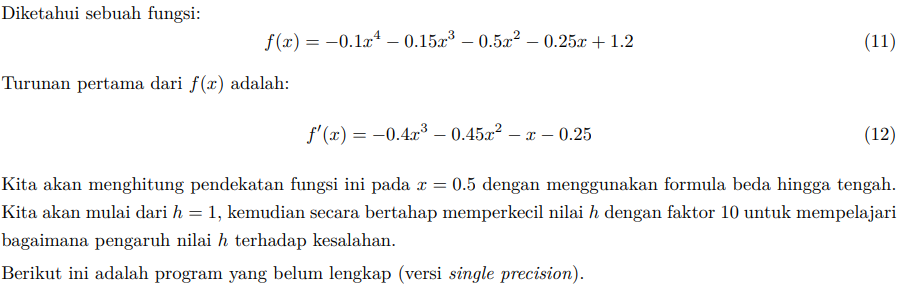

In [ ]:
import numpy as np

def f(x):
    return  -np.float32(0.1)*x**np.float32(4) - \
      np.float32(0.15)*x**np.float32(3) - \
      np.float32(0.5)*x**np.float32(2) - \
      np.float32(0.25)*x + np.float32(1.2)

def df(x):
    return -np.float32(0.4)*x**np.float32(3) - \
      np.float32(0.45)*x**np.float32(2) - \
      x - np.float32(0.25)

def centered_diff(f, x, h):
    return ( .... )/(np.float32(2)*h) # isi titik-titik

    x = np.float32(0.5)
    h = np.float32(1.0)
    true_val = # ... lengkapi

    print("--------------------------------------------------------")
    print(" h approx_val error")
    print("--------------------------------------------------------")

for i in range(11):
    approx_val = # ... lengkapi
    εt = abs(approx_val - true_val)
    print("%18.10f %18.14f %18.13f" % (h, approx_val, εt))
    h = h/np.float32(10)

print(type(h))
print(type(centered_diff(f,x,h)))



# **Soal 8. **
Lengkapi program di atas. Coba juga untuk versi double precision (default pada NumPy atau
np.float64). Apakah error yang Anda peroleh semakin mendekati nol apabila nilai h semakin diperkecil? NumPy
juga menyediakan tipe bilangan quadruple precision, yang lebih precise dari double precision, yaitu np.float128.
Coba ulangi perhitungan dan analisis Anda dengan menggunakan np.float128. Berikan penjelasan mengenai hasil yang Anda dapatkan

In [14]:
#Soal 8
import numpy as np

def f(x):
     return -np.float32(0.1)*x**np.float32(4) - \
          np.float32(0.15)*x**np.float32(3) - \
          np.float32(0.5)*x**np.float32(2) - \
          np.float32(0.25)*x + np.float32(1.2)

def df(x):
     return -np.float32(0.4)*x**np.float32(3) - \
          np.float32(0.45)*x**np.float32(2) - \
          x - np.float32(0.25)

def centered_diff(f, x, h):
     return (f(x + h) - f(x - h))/(np.float32(2)*h) # isi titik-titik

x = np.float32(0.5)
h = np.float32(1.0)
true_val = df(x) # ... lengkapi

print("----------------------------------------------------------------------------")
print("            h            approx_val          true_val           error       ")
print("----------------------------------------------------------------------------")

for i in range(11):
     approx_val = centered_diff(f, x, h)# ... lengkapi
     εt = abs(approx_val - true_val)
     print("%18.10f %18.14f %18.14f %18.13f" % (h, approx_val, true_val, εt))
     h = h/np.float32(10)

print(type(h))
print(type(centered_diff(f,x,h)))

# Dengan double precision, ketika nilai h semakin mendekati nol, nilai error juga ikut berkurang.
# Sedangkan jika memakai np.float128() maka hasil approx_val lebih akurat dibanding np.float64() sehingga error nya lebih kecil.


----------------------------------------------------------------------------
            h            approx_val          true_val           error       
----------------------------------------------------------------------------
      1.0000000000  -1.26250004768372  -0.91250002384186    0.3500000238419
      0.1000000015  -0.91600000858307  -0.91250002384186    0.0034999847412
      0.0099999998  -0.91253519058228  -0.91250002384186    0.0000351667404
      0.0009999999  -0.91248756647110  -0.91250002384186    0.0000124573708
      0.0001000000  -0.91254723072052  -0.91250002384186    0.0000472068787
      0.0000100000  -0.91493141651154  -0.91250002384186    0.0024313926697
      0.0000010000  -0.92387211322784  -0.91250002384186    0.0113720893860
      0.0000001000  -0.89406979084015  -0.91250002384186    0.0184302330017
      0.0000000100   0.00000000000000  -0.91250002384186    0.9125000238419
      0.0000000010   0.00000000000000  -0.91250002384186    0.9125000238419
      0.0

# **2.  Soal tambahan**

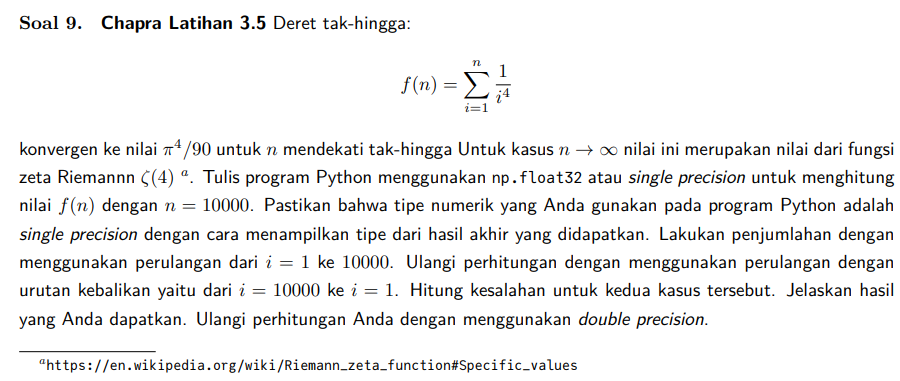

In [15]:
# Soal 9
# single precission
import numpy as np

f_true = np.float32(np.pi)**4/90
y_a = np.float32(0)
y_b = np.float32(0)

for i in range(1,10001):
    y_a+= (1)/i**4
    error1 = abs(np.float32(f_true) - np.float32(y_a))*100/np.float32(f_true)
print("Hasil untuk i = 1 sampai i = 10000 = ", y_a)
print("error = ", error1, "%")

for i in range(10000, 0, -1):
    y_b+= np.float32(1)/i**4
    error2 = abs(np.float32(f_true) - np.float32(y_b))/np.float32(f_true)*100
print("Hasil untuk i = 10000 sampai i = 1 = ", y_b)
print("error = ", error2, "%")


Hasil untuk i = 1 sampai i = 10000 =  1.082323233710861
error =  1.1014203255666313e-05 %
Hasil untuk i = 10000 sampai i = 1 =  1.0823232337108049
error =  1.1014203238346454e-05 %


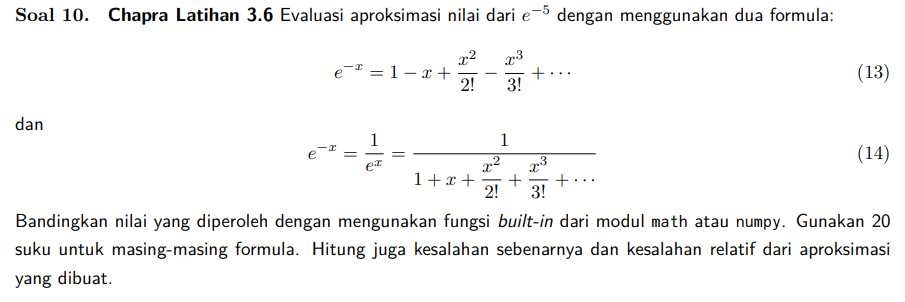

In [16]:
# Soal 10

from math import factorial, exp

approx_val_1 = 0.0
approx_val_2 = 0.0
sum_val_2 = 0.0

x = 5
true_val = exp(-x)

prev_approx_1 = 0.0
prev_approx_2 = 0.0

print("Formula 13")
print("       approx val 1", "   true error 1", "   relative error 1")
for i in range(20):
    approx_val_1 += ((-x)**(i))/factorial(i)
    ε_t_percent_1 = abs(approx_val_1 - true_val)/true_val *100
    if i>0:
        ε_r_percent_1 = abs(approx_val_1 - prev_approx_1)/approx_val_1 *100
    else:
        ε_r_percent_1 = float("nan")
    prev_approx_1 = approx_val_1

    print("%3d %18.10f %13.5f %% %13.5f %%" %(i+1, approx_val_1, ε_t_percent_1, ε_r_percent_1))

print("")
print("Formula 14")
print("       approx val 2", "   true error 2", "   relative error 2")
for i in range(20):
    sum_val_2 += (x**i)/factorial(i)
    approx_val_2 = 1/sum_val_2
    ε_t_percent_2 = abs(approx_val_2 - true_val)/true_val *100
    if i>0:
        ε_r_percent_2 = abs(approx_val_2 - prev_approx_2)/approx_val_2 *100
    else:
        ε_r_percent_2 = float("nan")
    prev_approx_2 = approx_val_2

    print("%3d %18.10f %13.5f %% %13.5f %%" %(i+1, approx_val_2, ε_t_percent_2, ε_r_percent_2))

print("")
print("true val is %18.10f" % (true_val))
print("approx_val_1 is %14.10f" % (approx_val_1))
print("approx_val_2 is %14.10f" % (approx_val_2))

Formula 13
       approx val 1    true error 1    relative error 1
  1       1.0000000000   14741.31591 %           nan %
  2      -4.0000000000   59465.26364 %    -125.00000 %
  3       8.5000000000  126051.18524 %     147.05882 %
  4     -12.3333333333  183142.89623 %    -168.91892 %
  5      13.7083333333  203349.70560 %     189.96960 %
  6     -12.3333333333  183142.89623 %    -211.14865 %
  7       9.3680555556  138934.27196 %     231.65308 %
  8      -6.1329365079   91120.84817 %    -252.74992 %
  9       3.5551835317   52663.60191 %     272.50689 %
 10      -1.8271053792   27216.64813 %    -294.58010 %
 11       0.8640390763   12723.47689 %     311.46097 %
 12      -0.3592084035    5431.12539 %    -340.53977 %
 13       0.1504780464    2133.29222 %     338.71150 %
 14      -0.0455552035     776.09917 %    -430.32022 %
 15       0.0244566714     262.96919 %     286.26903 %
 16       0.0011193798      83.38693 %    2084.84127 %
 17       0.0084122834      24.84936 %      86.69351 

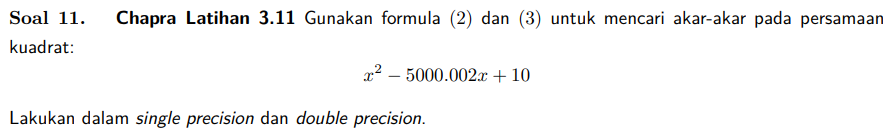

In [17]:
#Soal 11

import numpy as np

#single precision
def calc_quad_root_v1(a, b, c):
     D = np.float32((b**2)) - np.float32((4)*a*c)
     x1 = (-b + np.sqrt(D))/(np.float32((2)*a))
     x2 = (-b - np.sqrt(D))/(np.float32((2)*a))
     return x1, x2

def calc_quad_root_v2(a, b, c):
     D = np.float32(b**2) - np.float32(4)*a*c
     x1 = (np.float32(-(2*c)))/(b+ np.sqrt(D))
     x2 = (np.float32(-(2*c)))/(b - np.sqrt(D))
     return x1, x2

a = np.float32(1.0)
b = np.float32(-5000.002)
c = np.float32(10.0)


x1, x2 = calc_quad_root_v1(a, b, c)
print("Using 1st formula (single precision): approx roots: ", x1, " ", x2)
print(type(x1), type(x2)) # pastikan x1 dan x2 merupakan np.float32

x1, x2 = calc_quad_root_v2(a, b, c)
print(type(x1), type(x2))
print("Using 2nd formula (single precision): approx roots: ", x1, " ", x2)


#double precision
def calc_quad_root_v1(a, b, c):
     D = np.float64((b**2)) - np.float64((4)*a*c)
     x1 = (-b + np.sqrt(D))/(np.float64((2)*a))
     x2 = (-b - np.sqrt(D))/(np.float64((2)*a))
     return x1, x2

def calc_quad_root_v2(a, b, c):
     D = np.float64(b**2) - np.float64(4)*2*2
     x1 = (np.float64(-(2*2)))/(b + np.sqrt(2))
     x2 = (np.float64(-(2*2)))/(b - np.sqrt(2))
     return x1, x2

a = np.float64(1.0)
b = np.float64(-5000.002)
c = np.float64(10.0)

x1, x2 = calc_quad_root_v1(a, b, c)
print("Using 1st formula (double precision): approx roots: ", x1, " ", x2)
print(type(x1), type(x2)) # pastikan x1 dan x2 merupakan np.float32

x1, x2 = calc_quad_root_v2(a, b, c)
print(type(x1), type(x2))
print("Using 2nd formula (double precision): approx roots: ", x1, " ", x2)

Using 1st formula (single precision): approx roots:  5000.0   0.001953125
<class 'numpy.float32'> <class 'numpy.float32'>
<class 'numpy.float32'> <class 'numpy.float32'>
Using 2nd formula (single precision): approx roots:  5120.0   0.002
Using 1st formula (double precision): approx roots:  5000.0   0.0019999999999527063
<class 'numpy.float64'> <class 'numpy.float64'>
<class 'numpy.float64'> <class 'numpy.float64'>
Using 2nd formula (double precision): approx roots:  0.0008002260180071187   0.0007997734699929939


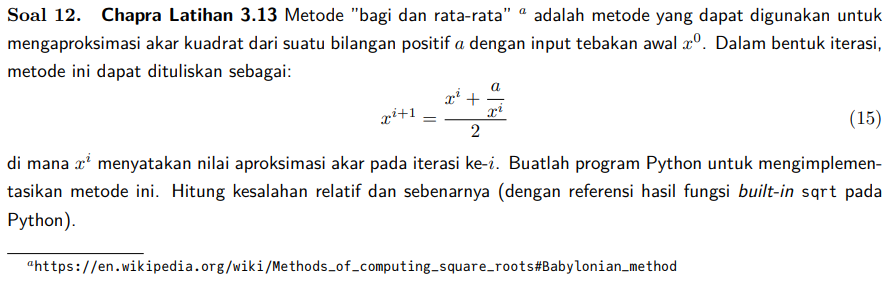

In [18]:
#Soal 12

from math import sqrt
a = int(input("Masukkan nilai akar : "))
x = int(input("Masukan tebakan : "))
x_awal = x
true_val = sqrt(a)
def approx_exp(x, N):
    assert(N >= 0)
    if N == 0:
        return 1
    s = 0.0
    for i in range(N+1):
        s = ((x)+(a/(x)))/2  #equation bagian kanan
        x = s
    return s
n_digit = int(input("Masukan Digit Signifikan : "))
# Equation 3.7
ε_s_percent = 0.5*10**(2- n_digit)
prev_approx = 0.0
for N in range(100):
    approx_val = approx_exp(x, N)
    ε_t_percent = abs(approx_val - true_val)/true_val * 100
    if N > 0:
        ε_a_percent = abs(approx_val - prev_approx)/approx_val * 100
    else:
        ε_a_percent = float('nan')
    prev_approx = approx_val
    print("%3d %18.10f %10.5f%% %10.5f%%" % (N+1, approx_val, ε_t_percent, ε_a_percent))
    if ε_a_percent < ε_s_percent:
        print("Converged within %d significant digits" % n_digit)
        break
print("true_val is %18.10f" % true_val)
print("approx_val is %18.10f" % approx_val)

Masukkan nilai akar : 6
Masukan tebakan : 8
Masukan Digit Signifikan : 5
  1       1.0000000000   59.17517%        nan%
  2       2.8732142857   17.29848%   65.19577%
  3       2.4807339297    1.27554%   15.82114%
  4       2.4496864989    0.00803%    1.26740%
  5       2.4494897507    0.00000%    0.00803%
  6       2.4494897428    0.00000%    0.00000%
Converged within 5 significant digits
true_val is       2.4494897428
approx_val is       2.4494897428


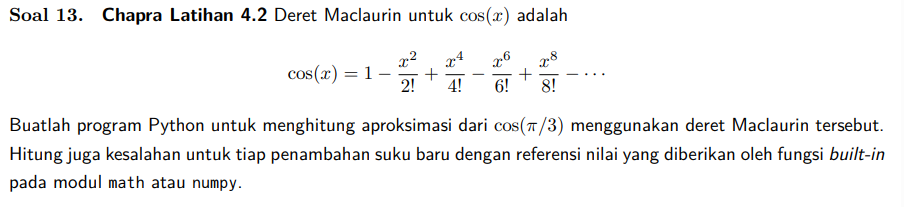

In [22]:
# Soal 13

from math import factorial, exp
import numpy as np
def approx_exp(x, N):
    assert(N >= 0)
    if N == 0:
        return 1
    s = 0.0
    for i in range(N+1):
        s = s + (((-1)**i)*x**(2*i ))/factorial(2*i) #formula deret mclaurin tan(x)
    return s

x = np.pi/6
true_val = np.cos(x) / np.sin(x) # from math module
n_digit = int(input("Masukan Digit Signifikan : "))

# Equation 3.7
ε_s_percent = 0.5*10**(2- n_digit)
prev_approx = 0.0

for N in range(100):
    approx_val = approx_exp(x, N)
    ε_t_percent = abs(approx_val - true_val)/true_val * 100
    if N > 0:
        ε_a_percent = abs(approx_val - prev_approx)/approx_val * 100
    else:
        ε_a_percent = float('nan')
    prev_approx = approx_val
    print("%3d %18.10f %10.5f%% %10.5f%%" % (N+1, approx_val, ε_t_percent, ε_a_percent))
    if ε_a_percent < ε_s_percent:
        print("Converged within %d significant digits" % n_digit)
        break

print("true_val is %18.10f" % true_val)
print("approx_val is %18.10f" % approx_val)

Masukan Digit Signifikan : 6
  1       1.0000000000   42.26497%        nan%
  2       0.8629221611   50.17917%   15.88531%
  3       0.8660538834   49.99836%    0.36161%
  4       0.8660252641   50.00001%    0.00330%
  5       0.8660254042   50.00000%    0.00002%
Converged within 6 significant digits
true_val is       1.7320508076
approx_val is       0.8660254042


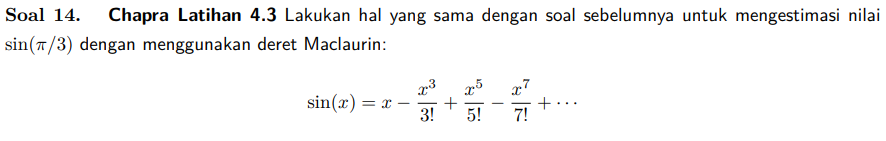

In [ ]:
# Soal 14

from math import factorial, exp
import numpy as np

def approx_exp(x, N):
    assert(N >= 0)
    if N == 0:
        return 1
    s = 0.0
    for i in range(N+1):
        s = s + (((-1)**(i))*x**(2*i+1))/factorial(2*i+1) #formula deret mclaurin sin(x)
    return s

x = np.pi/3
true_val = np.sin(x) # from math module
n_digit = int(input("Masukan Digit Signifikan : "))

# Equation 3.7
ε_s_percent = 0.5*10**(2- n_digit)
prev_approx = 0.0

for N in range(100):
    approx_val = approx_exp(x, N)
    ε_t_percent = abs(approx_val - true_val)/true_val * 100
    if N > 0:
        ε_a_percent = abs(approx_val - prev_approx)/approx_val * 100
    else:
        ε_a_percent = float('nan')
    prev_approx = approx_val
    print("%3d %18.10f %10.5f%% %10.5f%%" % (N+1, approx_val, ε_t_percent, ε_a_percent))
    if ε_a_percent < ε_s_percent:
        print("Converged within %d significant digits" % n_digit)
        break

print("true_val is %18.10f" % true_val)
print("approx_val is %18.10f" % approx_val)

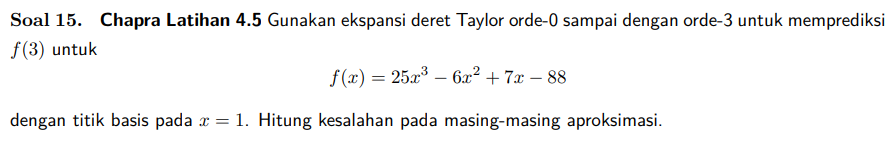

In [20]:
# Soal 15

from sympy import *
init_printing(use_unicode=True)

x = symbols("x")
f = 25*x**3 - 6*x**2 + 7*x - 88 #deret taylor
xi = 1
xip1 = 3
h = xip1 - xi
f_approx = diff(f, x, 0).subs({x: xi})
f_true = N(f.subs({x: xip1}))

for n in range(1,4): # from 1 to 6
    new_term = diff(f, x, n) * h**n / factorial(n)
    f_approx = f_approx + new_term
    e_t =(f_true-f_approx.subs({x: xi}))/f_true *100
    pprint(f_approx)
    print("Nilai Aproksimasi : " ,N(f_approx.subs({x: xi})))
    print("Error tiap step",e_t, "%")

f_true = N(f.subs({x: xip1}))
print()
print("f_aproksimasi :", f_approx.subs({x: xi}))
print("Dengan error ", e_t, "%") #kesalahan aproksimasi
print("f_true = ", f_true)
print(type(f_true))

     2            
150⋅x  - 24⋅x - 48
Nilai Aproksimasi :  78.0000000000000
Error tiap step 85.9205776173285 %
     2                            
150⋅x  - 24⋅x + 12⋅(25⋅x - 2) - 48
Nilai Aproksimasi :  354.000000000000
Error tiap step 36.1010830324910 %
     2                             
150⋅x  - 24⋅x + 12⋅(25⋅x - 2) + 152
Nilai Aproksimasi :  554.000000000000
Error tiap step 0 %

f_aproksimasi : 554
Dengan error  0 %
f_true =  554.000000000000
<class 'sympy.core.numbers.Float'>


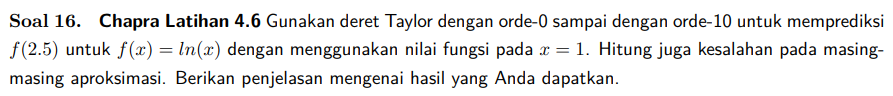

In [ ]:
# Soal 16

import sympy
init_printing(use_unicode=True)
x = symbols("x")
f = sympy.log(x)
xi = 1
xip1 = 2.5
h = xip1 - xi
f_approx = diff(f, x, 0).subs({x: xi})
f_true = N(f.subs({x: xip1}))

for n in range(1,10): # from 1 to 6
    new_term = diff(f, x, n) * h**n / factorial(n)
    f_approx = f_approx + new_term
    e_t =abs(f_true-f_approx.subs({x: xi}))/f_true * 100
    pprint(f_approx)
    print("Nilai Aproksimasi : " ,N(f_approx.subs({x: xi})))
    print("Error tiap step",e_t, "%")

f_true = N(f.subs({x: xip1}))
print()
print("f_aproksimasi :", f_approx.subs({x: xi}))
print("Dengan error ", e_t, "%")
print("f_true = ", f_true)
print(type(f_true))

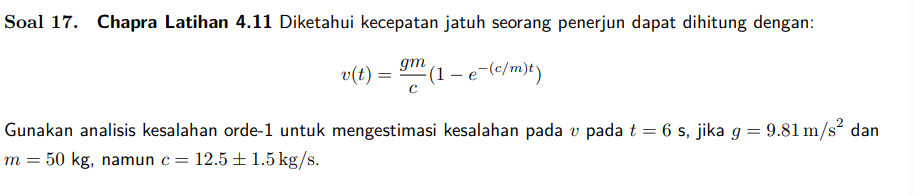

In [ ]:
#Soal 17

from sympy import *
g, m, c, t = symbols("g m c t")
v = (g*m/c)*(1-exp(-c *t /m)) #formula
g_num = 9.81;                 #dari soal #m/s^2
m_num = 50;                   #kg
c_num = 12.5; Δc = 1.5        # N/m^2 dengan estimasi kesalahan 1.5
t_num = 6.0;                  #seconds

# Hitung nilai y dengan nilai numerik
dict_subs = {g: g_num, m: m_num, c: c_num, t: t_num}
v_num = v.subs(dict_subs)
print("v = ", v_num)

# Hitung nilai Δy dengan Pers. 4.27
Δv = abs(diff(v,c))*Δc        #estimasi kesalahan
pprint(Δv)                    # bentuk simbolik
print("Δv = ", Δv.subs(dict_subs)) # evaluasi/substitusi nilai numerik

v_val = v.subs(dict_subs)
print("nilai v = ",  v_val, " ± ", Δv.subs(dict_subs), " m/s")

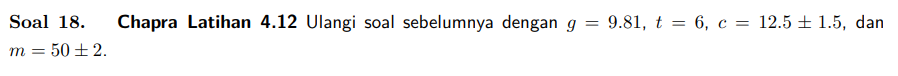

In [ ]:
# Soal 18

from sympy import *
g, m, c, t = symbols("g m c t")
v = (g*m/c)*(1-exp(-c *t /m))
g_num = 9.81;                 #dari soal #m/s^2
m_num = 50; Δm = 2            #kg, dengan estimasi kesalahan 2
c_num = 12.5; Δc = 1.5        # N/m^2, dengan estimasi kesalahan 1.5
t_num = 6.0; #seconds

# Hitung nilai y dengan nilai numerik
dict_subs = {g: g_num, m: m_num, c: c_num, t: t_num}
v_num = v.subs(dict_subs)
print("v = ", v_num)
# Hitung nilai Δy dengan Pers. 4.27
Δv = abs(diff(v,c))*Δc #estimasi kesalahan
pprint(Δv) # bentuk simbolik
print("Δv = ", Δv.subs(dict_subs)) # evaluasi/substitusi nilai numerik

v_val = v.subs(dict_subs)
print("nilai v = ", v_val, " ± ", Δv.subs(dict_subs), " m/s")